# Piège de Penning

_À partir du sujet de 2021_

En physique, les pièges à ions sont des dispositifs permettant de stocker des particules chargées pendant une longue durée, notamment dans le but de mesurer leurs propriétés avec précision.

Il n'est pas possible de réaliser un piège à ions uniquement avec un champ électrique statique : en effet, un tel piège nécéssiterait d'avoir un maximum ou minimum du potentiel électrique - ce qui est impossible car son Laplacien est nul.

Le piège de Penning est un dispositif permettant de stocker des particules chargées, grâce à la combinaison d'un champ magnétique uniforme et d'un champ électrique quadripolaire constant. Nous proposons d'en simuler le comportement. 

On considère un ion béryllium $Be^+$ dont on notera $q$ la chage. On note $B$ l'amplitude du champ magnétique, uniforme, et dirigé selon $z$. Le champ electrostatique dipolaire dérive du potentiel suivant :

$$ 
V = \frac{Q}{2} \left(x^2 +y^2 - 2z^2\right)
$$

Le champ électrique vaut donc :

$$
\vec E = -Q\left( x\vec{u}_x + y\vec{u}_y  -2z\vec{u}_z \right)
$$

La force est donnée par :

$$
\vec{F} = q\left(\vec{E} + \vec{v}\wedge\vec{B}\right)
$$

où le symbol $\wedge$ représente le produit vectoriel.

Valeurs numériques : 

In [1]:
proton_mass = 1.67E-27
m = 9*proton_mass
q = e = 1.6E-19

# Valeurs par défaut
B = 2 # Tesla
Q = -300/1E-2**2 # 300V/cm^2

1. Ecrire une fonction python qui renvoie l'accélération $\vec{F}/m$ en fonction de $\vec{r}$ la position et $\vec{v}$ la vitesse représentée par des tableaux numpy. On pourra utiliser la fonction ``np.cross`` pour  calculer la produit vectoriel

In [2]:
import numpy as np
u_x = np.array([1, 0, 0])
u_y = np.array([0, 1, 0])
u_z = np.array([0, 0, 1])

def acceleration(r, v, Q, B):
    return q*(-Q*r*np.array([1, 1, -2]) + np.cross(v, B*u_z))/m

2. Ecrire une fonction qui à partir d'une condition initiale $r_0$, $v_0$ renvoie la position et la vitesse pour un ensemble de valeur (croissante) $t_i$

        def trajectoire(r_0, v_0, t_array, Q, B):
            ....
            return x, y, z, vx, vy, vz




In [3]:
from scipy.integrate import solve_ivp

def fun(t, y, Q, B):
    r = y[:3]
    v = y[3:6]
    acc = acceleration(r, v, Q, B)
    return np.concatenate([v, acc])

def trajectoire(r_0, v_0, t_array, Q, B):
    y0 = np.concatenate([r_0, v_0])
    res = solve_ivp(fun, [0, t_array[-1]], y0, method='RK45', t_eval=t_array, args=(Q,B))
    x, y, z, vx, vy, vz = res.y
    return x, y, z, vx, vy, vz

3. Dans un champ magnétique uniforme (sans champ électrique), un particule à une trajectoire circulaire dans le plan orthogonal au champ. Vérifier ceci en calculant la tractoire d'une particule ayant initialement une vitesse de 100 m/s dans ce plan.


In [4]:
t_array = np.linspace(0, 1E-6)

x, y, z, vx, vy, vz = trajectoire(0*u_x, 100*u_x, t_array, Q=0, B=B)

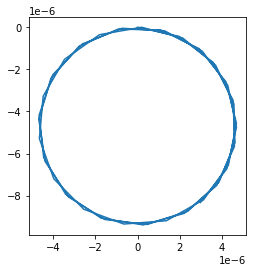

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots(1, 1)

ax.plot(x, y)
ax.set_aspect(1)

4. On considère maintenant une particule dans le champ magnétique et électrique. Paramètre initiaux : $\vec{r} = (0, 100~\mathrm{\mu m}, 0)$ et  $\vec{v} = (500~\mathrm{m/s}, 100~\mathrm{m/s}, 1~\mathrm{m/s})$. On calculera pendant $5~\mathrm{\mu s}$ en échantillonant sur au moins 2000 points. Tracer la trajectoire dans le plan $x, y$ puis en 3D.


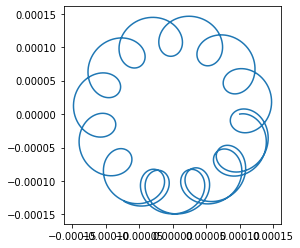

In [6]:
t_array = np.linspace(0, 5E-6, 2001)

R = 100e-6
vx0 = 500
vy0 = 100
vz0 = 1
x, y, z, vx, vy, vz = trajectoire(R*u_x, vx0*u_x + vy0*u_y + vz0*u_z, t_array, Q=Q, B=B)

fig = plt.figure()
ax = fig.subplots(1, 1)

ax.plot(x, y)
ax.set_aspect(1)

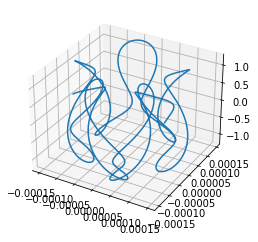

In [7]:
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.plot(x, y, z)
